In [11]:
# In Kaggle: uncomment this following line:
# !pip install --upgrade tensorflow
# then click `restart and clear all cells` and DO NOT FACTORY RESET

### Imports

In [12]:
import tensorflow as tf
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,\
    Embedding, Lambda
from tensorflow.keras.preprocessing.text import Tokenizer
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import sparse_categorical_accuracy
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.metrics import Accuracy
from sklearn.model_selection import train_test_split


### Load in Data - replace file path with your relative path

In [13]:
df = pd.read_csv('../Data/sampled_test_hand_labeled.csv')

### Inspect the Data to verify this was done correctly

In [14]:
df.head()

,Unnamed: 0,text,label
0,0,militants engaged former officials hamid karza...,1
1,1,american spirit gets lebanese makeover beirut ...,1
2,2,pleasant protest tyranny workplace productivit...,1
3,3,see latest charts maps coronavirus cases death...,0
4,4,biden administration said measures would degra...,1


### Form the corpus

In [15]:
corpus = df['text'].tolist()

### Inspect to verify this was done correctly - remove semi-colon to display all rows

In [16]:
corpus;

### Continue alone with process outlined in documentation - tokenize, sequence, pad, train, analyze.

In [17]:
# Define the corpus
# corpus = ['The cat sat on the mat',
#           'The dog ran in the park',
#           'The bird sang in the tree']

 
# Convert the corpus to a sequence of integers
tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)
sequences = tokenizer.texts_to_sequences(corpus)
print("After converting our words in the corpus \
into vector of integers:")
print(sequences)

After converting our words in the corpus into vector of integers:
[[212, 213, 214, 215, 216, 217, 83, 83, 54, 218, 219, 84, 220, 221, 85, 222, 223, 224, 225, 226, 227, 228, 229, 26, 85], [23, 230, 55, 231, 232, 233, 234], [235, 86, 236, 237, 238, 87, 239, 240, 241], [1, 8, 12, 2, 6, 9, 13, 14, 242, 24, 243, 3, 88, 10, 7, 11, 15], [89, 27, 56, 244, 34, 245, 246, 90, 91, 247, 34, 248, 92, 249, 250, 251, 40, 17, 252, 93, 57, 92, 253, 254, 58], [255, 256, 257, 35, 94, 258, 259, 95, 260, 261, 262, 263, 264, 21, 265, 35, 94, 266, 59, 267, 28], [1, 8, 12, 2, 6, 9, 13, 14, 96, 3, 41, 96, 3, 41, 10, 7, 11, 15], [268, 269, 97, 60, 98, 36, 270, 271, 272, 99, 273, 42, 274, 100, 275, 61, 276, 277, 62, 278], [101, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290], [291, 292, 293, 43, 294, 295, 296, 27, 297, 102, 90, 103, 62], [29, 104, 22, 63, 298, 299, 105, 106, 300, 44, 22, 301, 18, 302], [1, 8, 12, 2, 6, 9, 13, 14, 107, 108, 3, 109, 107, 108, 3, 109, 10, 7, 11, 15], [1, 16, 4, 2, 110, 5

In [18]:
# Define the parameters
vocab_size = len(tokenizer.word_index) + 1
embedding_size = 10
window_size = 2
 
# Generate the context-target pairs
contexts = []
targets = []
for sequence in sequences:
    for i in range(window_size, len(sequence) - window_size):
        context = sequence[i - window_size:i] +\
            sequence[i + 1:i + window_size + 1]
        target = sequence[i]
        contexts.append(context)
        targets.append(target)

In [19]:
# Convert the contexts and targets to numpy arrays
X = np.array(contexts)
 

In [20]:
X_train = X
y_train = df['label']
y_train = np.array(y_train)

In [21]:
type(X_train)

numpy.ndarray

In [22]:
y_train

array([1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1])

### Modeling Section

In [23]:
# Define the CBOW model
model = Sequential()
model.add(Embedding(input_dim=vocab_size,
                    output_dim=embedding_size,
                    input_length=2*window_size))
model.add(Lambda(lambda x: tf.reduce_mean(x, axis=1)))
model.add(Dense(units=vocab_size, activation='softmax'))
model.save_weights('cbow_weights.h5')
 
 
# Load the pre-trained weights
model.load_weights('cbow_weights.h5')

### Visualize the proximities 

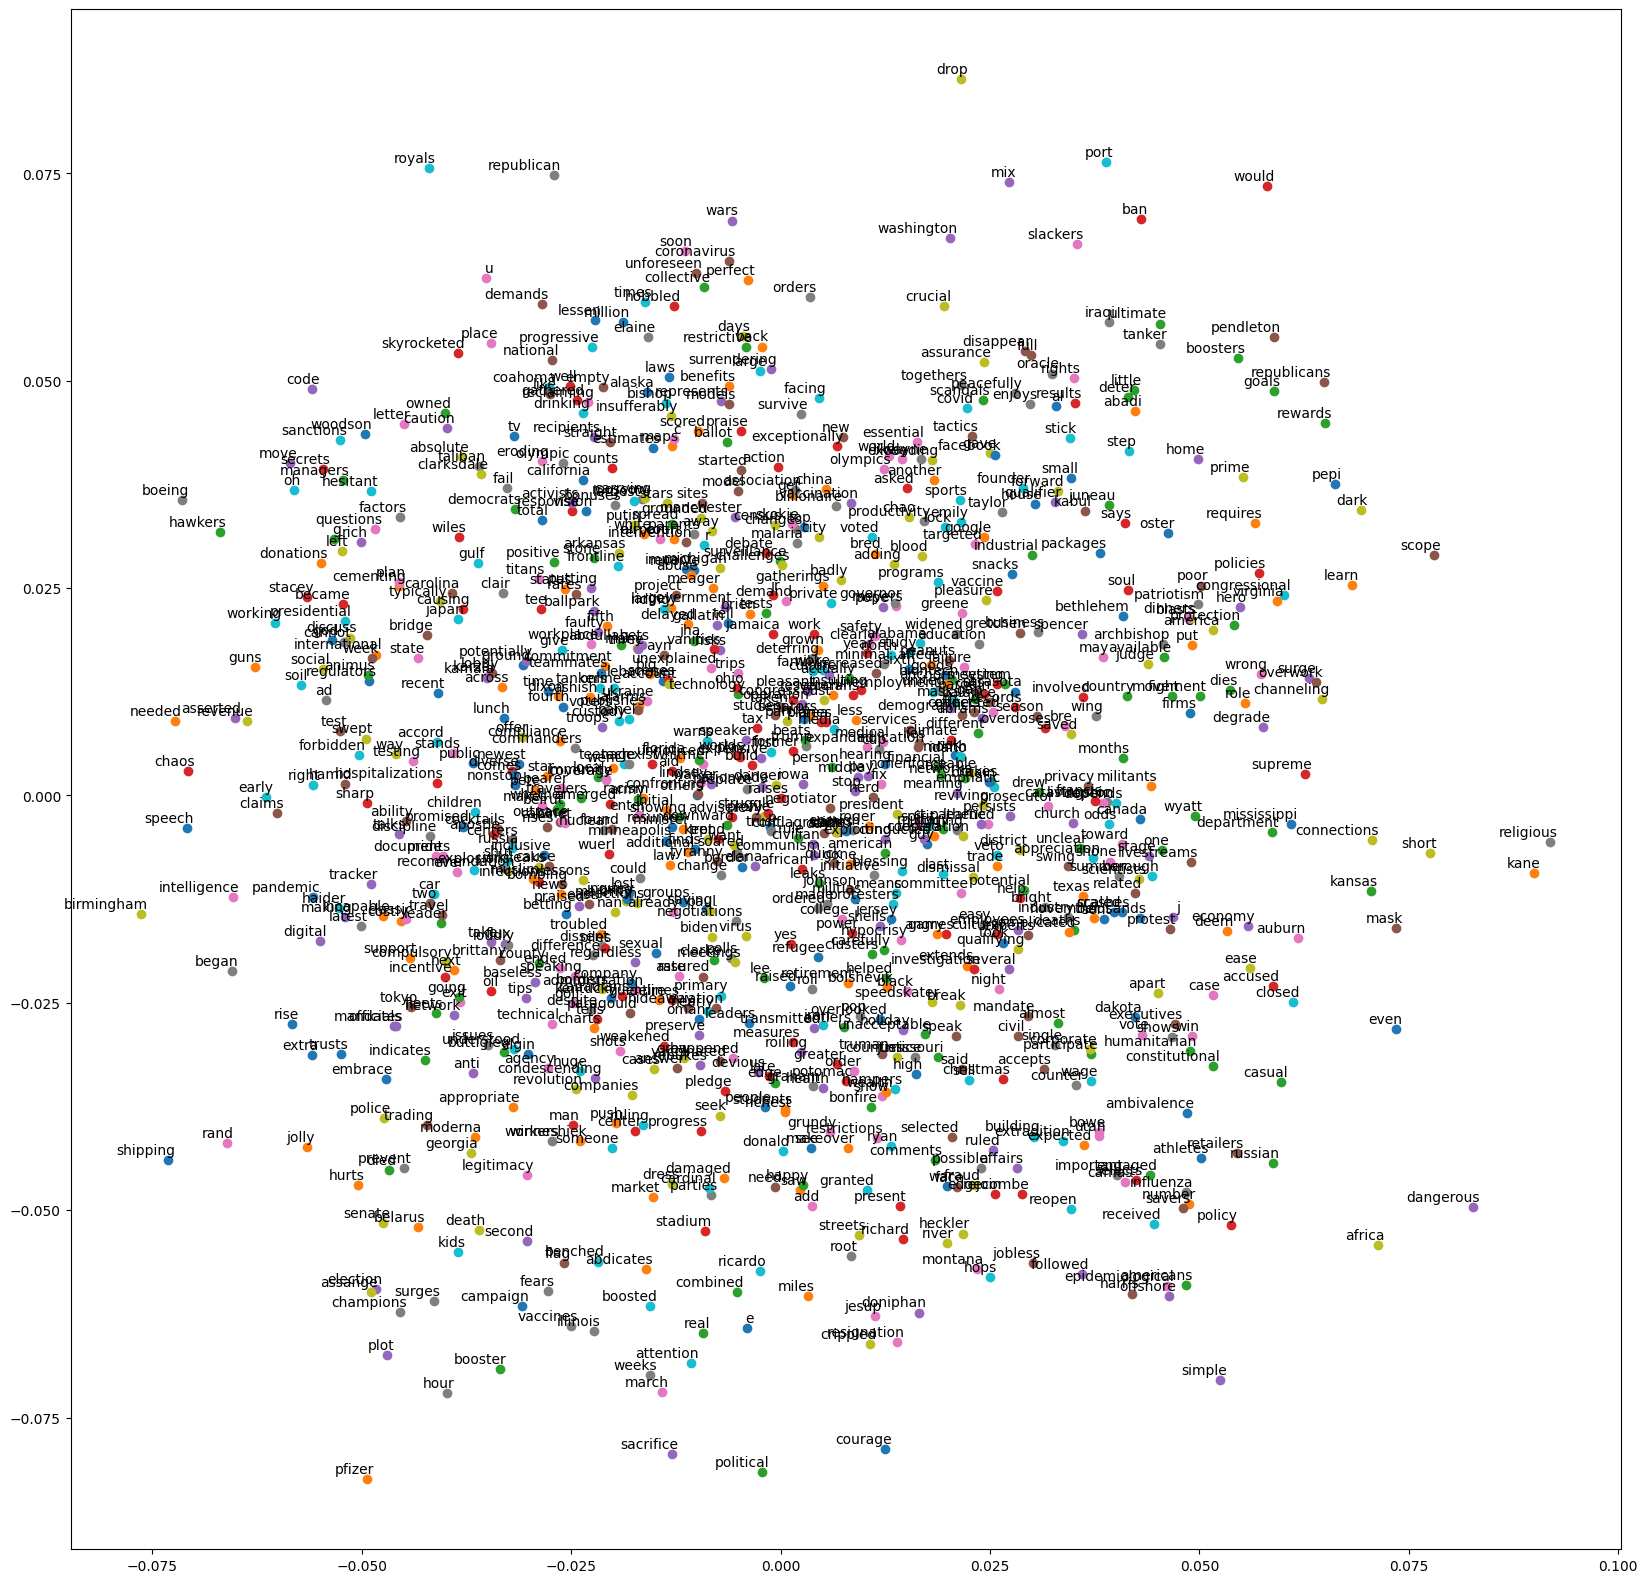

In [24]:
# Get the word embeddings
embeddings = model.get_weights()[0]
 
# Perform PCA to reduce the dimensionality
# of the embeddings
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings)
 
# Visualize the embeddings
plt.figure(figsize=(20, 20))
for i, word in enumerate(tokenizer.word_index.keys()):
    x, y = reduced_embeddings[i]
    plt.scatter(x, y)
    plt.annotate(word, xy=(x, y), xytext=(5, 2),
                 textcoords='offset points',
                 ha='right', va='bottom')
plt.show()

"This visualization allows us to observe the similarity of the words based on their embeddings. Words that are similar in meaning or context are expected to be close to each other in the plot."

In [25]:
# Source: https://www.geeksforgeeks.org/continuous-bag-of-words-cbow-in-nlp/

### Plot in Quadrants for better visualization

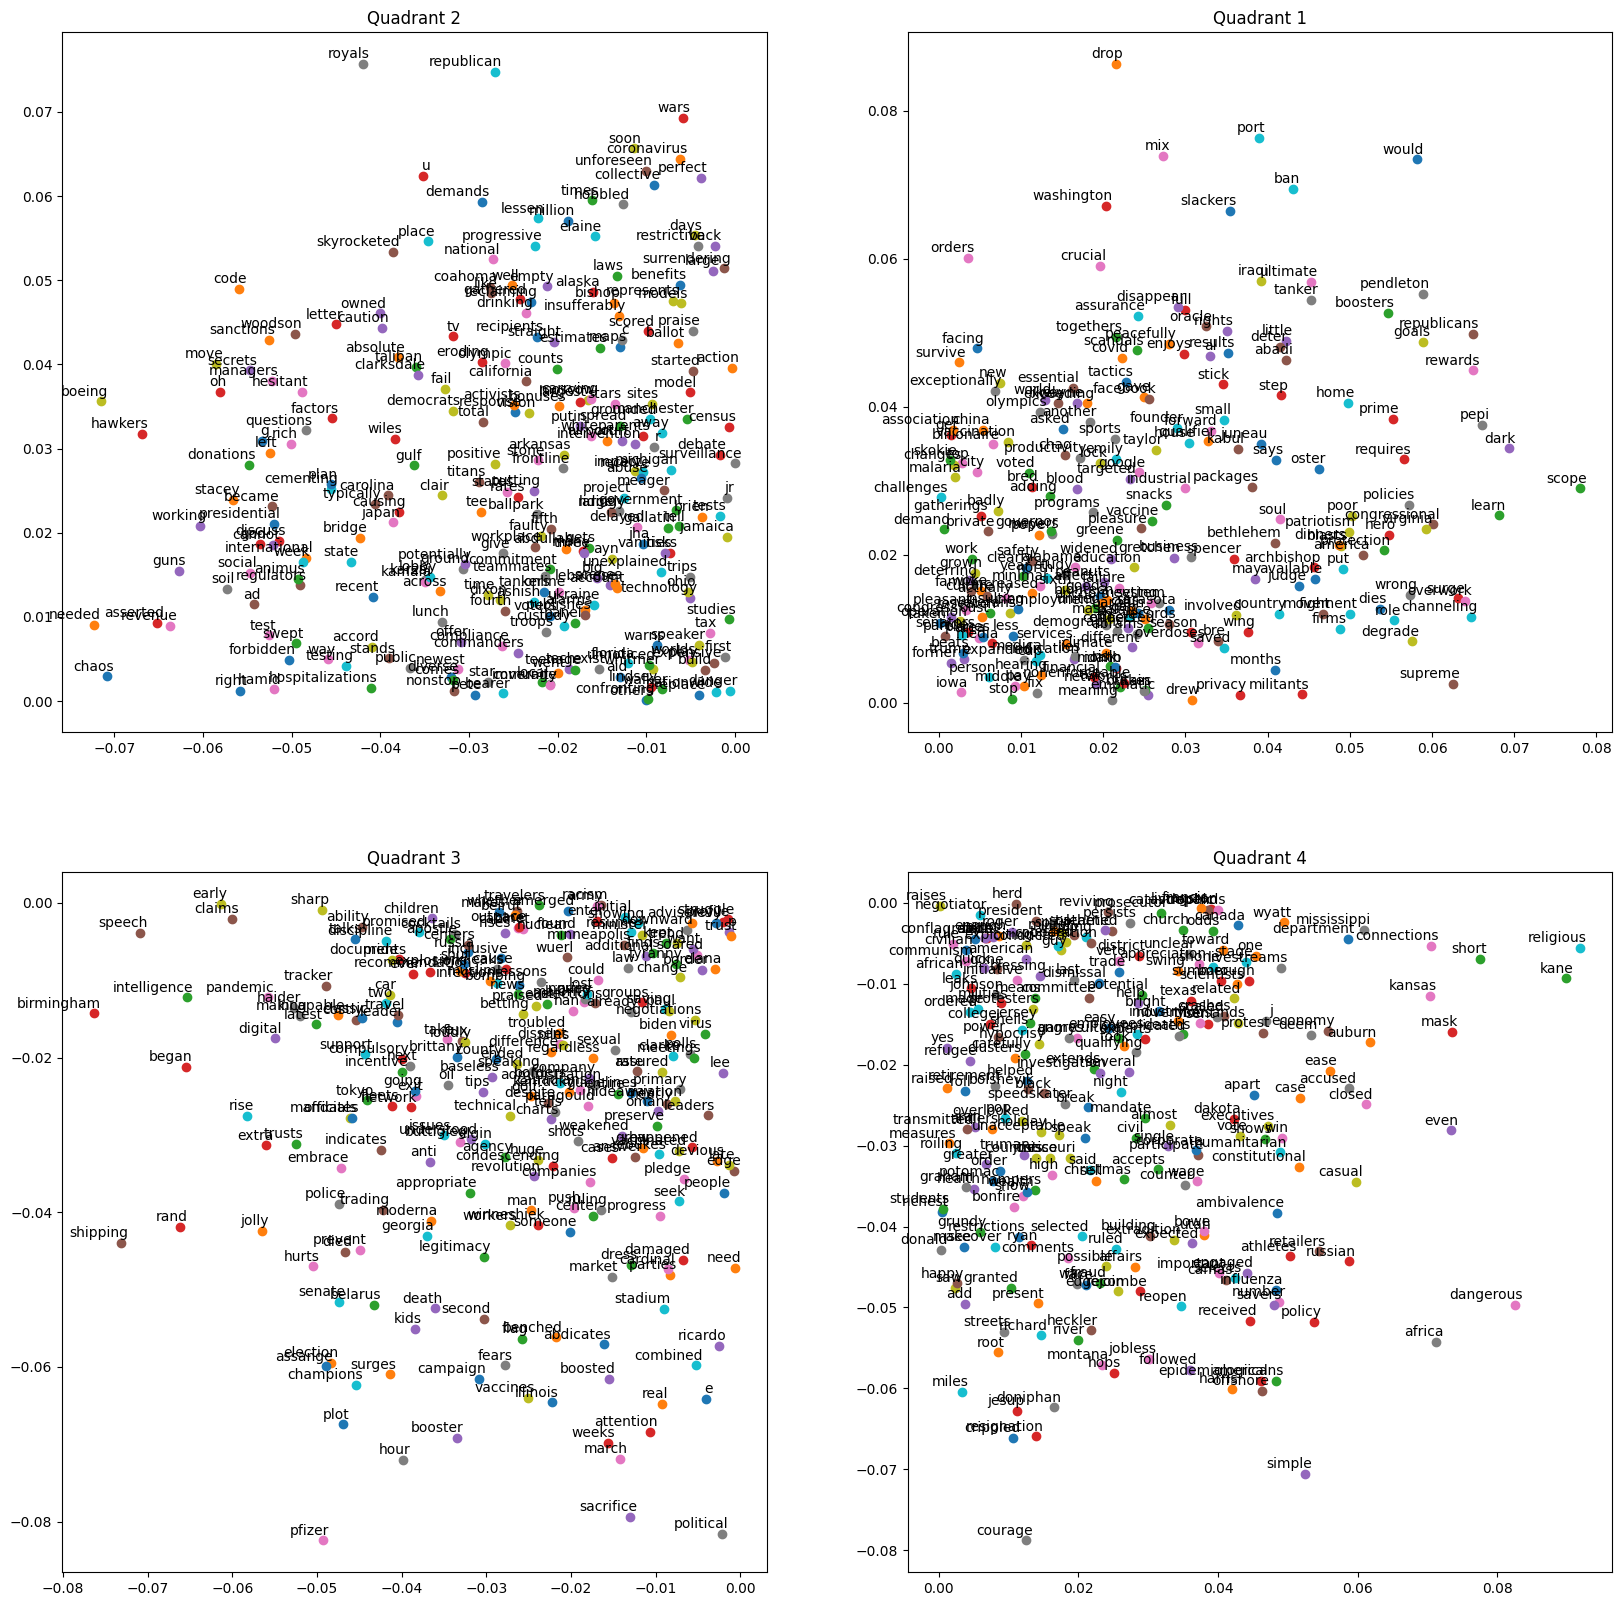

In [26]:
# Get the word embeddings
embeddings = model.get_weights()[0]

# Perform PCA to reduce the dimensionality of the embeddings
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings)

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(20, 20))

# Quadrant 1
axs[0, 1].set_title('Quadrant 1')
for i, word in enumerate(tokenizer.word_index.keys()):
    if reduced_embeddings[i, 0] >= 0 and reduced_embeddings[i, 1] >= 0:
        axs[0, 1].scatter(reduced_embeddings[i, 0], reduced_embeddings[i, 1])
        axs[0, 1].annotate(word, xy=(reduced_embeddings[i, 0], reduced_embeddings[i, 1]),
                           xytext=(5, 2), textcoords='offset points',
                           ha='right', va='bottom')

# Quadrant 2
axs[0, 0].set_title('Quadrant 2')
for i, word in enumerate(tokenizer.word_index.keys()):
    if reduced_embeddings[i, 0] < 0 and reduced_embeddings[i, 1] >= 0:
        axs[0, 0].scatter(reduced_embeddings[i, 0], reduced_embeddings[i, 1])
        axs[0, 0].annotate(word, xy=(reduced_embeddings[i, 0], reduced_embeddings[i, 1]),
                           xytext=(5, 2), textcoords='offset points',
                           ha='right', va='bottom')

# Quadrant 3
axs[1, 0].set_title('Quadrant 3')
for i, word in enumerate(tokenizer.word_index.keys()):
    if reduced_embeddings[i, 0] < 0 and reduced_embeddings[i, 1] < 0:
        axs[1, 0].scatter(reduced_embeddings[i, 0], reduced_embeddings[i, 1])
        axs[1, 0].annotate(word, xy=(reduced_embeddings[i, 0], reduced_embeddings[i, 1]),
                           xytext=(5, 2), textcoords='offset points',
                           ha='right', va='bottom')

# Quadrant 4
axs[1, 1].set_title('Quadrant 4')
for i, word in enumerate(tokenizer.word_index.keys()):
    if reduced_embeddings[i, 0] >= 0 and reduced_embeddings[i, 1] < 0:
        axs[1, 1].scatter(reduced_embeddings[i, 0], reduced_embeddings[i, 1])
        axs[1, 1].annotate(word, xy=(reduced_embeddings[i, 0], reduced_embeddings[i, 1]),
                           xytext=(5, 2), textcoords='offset points',
                           ha='right', va='bottom')

# Show the subplots
plt.show()


In [27]:
# # Save the entire figure - modify for your relative file path 
# plt.savefig('cbow_plot.png')

# # Save individual quadrants
# axs[0, 0].figure.savefig('quadrant_1.png')
# axs[0, 1].figure.savefig('quadrant_2.png')
# axs[1, 0].figure.savefig('quadrant_3.png')
# axs[1, 1].figure.savefig('quadrant_4.png')


# Word2Vec Gensim Model

In [28]:
from gensim.models import Word2Vec


In [29]:
# Tokenize sentences
tokenized_sentences = [sentence.split() for sentence in df['text']]

# Split data into training and testing sets
train_sentences, test_sentences = train_test_split(tokenized_sentences, test_size=0.2, random_state=42)

# Train Word2Vec model using Skip-gram
word2vec_model = Word2Vec(sentences=train_sentences, vector_size=50, window=5, sg=1, min_count=1, workers=4)

# Save or use the trained embeddings
word_embeddings = word2vec_model.wv

In [30]:
word_embeddings

In [31]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Accuracy
import tensorflow as tf
from sklearn.metrics.pairwise import cosine_similarity

# Drop rows with NaN values
df = df.dropna(subset=['text'])

# Tokenize and pad sequences
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['text'])
X = tokenizer.texts_to_sequences(df['text'])
X_padded = pad_sequences(X)

# Extract labels
y = np.array(df['label'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_padded, y, test_size=0.2, random_state=42)

# Calculate vocabulary size and embedding size
vocab_size = len(tokenizer.word_index) + 1
embedding_size = 50  # Adjust as needed

# Define a simple neural network for binary classification
model = Sequential()
model.add(Embedding(input_dim=vocab_size,
                    output_dim=embedding_size,
                    input_length=X_padded.shape[1]))
model.add(Flatten())
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(optimizer=Adam(), 
              loss=binary_crossentropy,
              metrics=[Accuracy()])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model on test data
evaluation = model.evaluate(X_test, y_test)

# Print the evaluation results
print("Test Loss:", evaluation[0])
print("Test Accuracy:", evaluation[1])

# Access the learned word embeddings from the embedding layer
embedding_layer = model.layers[0]
word_embeddings = embedding_layer.get_weights()[0]

# Assuming tokenizer is already defined
word_index = tokenizer.word_index

# Create a dictionary to map words to their corresponding embeddings
word_to_embedding = {word: word_embeddings[idx] for word, idx in word_index.items() if idx < len(word_embeddings)}

Epoch 1/10
2/2 [==============================] - 1s 190ms/step - loss: 0.6888 - accuracy: 0.0000e+00 - val_loss: 0.6895 - val_accuracy: 0.0000e+00
Epoch 2/10
2/2 [==============================] - 0s 30ms/step - loss: 0.6506 - accuracy: 0.0000e+00 - val_loss: 0.6920 - val_accuracy: 0.0000e+00
Epoch 3/10
2/2 [==============================] - 0s 31ms/step - loss: 0.6126 - accuracy: 0.0000e+00 - val_loss: 0.6874 - val_accuracy: 0.0000e+00
Epoch 4/10
2/2 [==============================] - 0s 30ms/step - loss: 0.5739 - accuracy: 0.0000e+00 - val_loss: 0.6761 - val_accuracy: 0.0000e+00
Epoch 5/10
2/2 [==============================] - 0s 31ms/step - loss: 0.5318 - accuracy: 0.0000e+00 - val_loss: 0.6641 - val_accuracy: 0.0000e+00
Epoch 6/10
2/2 [==============================] - 0s 30ms/step - loss: 0.4839 - accuracy: 0.0000e+00 - val_loss: 0.6537 - val_accuracy: 0.0000e+00
Epoch 7/10
2/2 [==============================] - 0s 30ms/step - loss: 0.4317 - accuracy: 0.0000e+00 - val_loss: 0.64

### It turns out these plots nor the Word2Vec model were incredibly insightful, we utilize cosine similarity to find similar words to ones we would find in hand labeled abstract/headline couplings we found to have tendency towards bias. 

# Cosine Similarity

In [32]:
# Example: Get the embedding for the word "county"
embedding_bias = word_to_embedding.get('county')

# Check if the word "county" is in the vocabulary
if embedding_bias is not None:
    # Handle NaN values in the embeddings and reshape for cosine similarity
    embedding_bias = np.nan_to_num(embedding_bias, nan=0.0).reshape(1, -1)

    # Perform a task like similarity analysis
    # Example: Find words similar to "county"
    similar_words = {word: cosine_similarity(embedding_bias, word_to_embedding[word].reshape(1, -1))[0][0] for word in word_to_embedding}

    # Example: Print the words with the highest similarity to "county"
    sorted_similar_words = sorted(similar_words.items(), key=lambda x: x[1], reverse=True)
    print("Words similar to 'county':", sorted_similar_words[:5])
else:
    print("The word 'county' is not in the vocabulary.")


Words similar to 'county': [('county', 1.0000001), ('tips', 0.5228555), ('african', 0.4952479), ('center', 0.4575066), ('deterring', 0.4290119)]


### This process may be continued by the user to choose multiple words they feel are represented more frequently in biased texts and then create labeling functions for those words (keyword functions, see labeling documents for more information) and then utilize those newly created functions in the labeling process. 